Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

home = getcwd()
choice = gui.ask_load_or_begin()
folders = files.Paths(home)
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        if file_name.endswith(".stl") or file_name.endswith(".STL"):
            folders.create_layers_3d(path_input, dpi, layer_height, file_name, folders)
        else:
            folders.create_layers_2d(path_input, dpi, layer_height, file_name, folders)
    layer.divide_islands(folders)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
Total de [Fase 0: ] : 0.36546945571899414


Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"

%reset_selective -f "camadas"
%reset_selective -f "c"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
OK: fechou contorno
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.4635508060455322
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.09274411201477051
Total de [Criando paredes finas] : 12.32142186164856
Total de [Fase 1: Camada: 0] : 12.3640296459198


Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
        print("pausa")
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 10
Total de [Criando Lvls] : 7.101833343505859
Criando os loops
Total de [Criando os loops] : 5.555335760116577
Criando regiões de influência
Total de [Criando regiões de influência] : 1.243912696838379
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 7.738767385482788
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:146 maior void:0.04140526976160602Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:76 maior void:0.060225846925972396Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:79873 maior void:55.116687578419075Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 2] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 

Pontes

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.make_bridges(n_max, nozzle_diam_internal, folders)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c" 
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 2.6107566356658936
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 27.43625497817993
Criando pontes de Crossover
Elemento: ('Reg_001', 'Reg_002') Maior prioridade: 0
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 1
Elemento: ('Reg_000', 'Reg_003') Maior prioridade: 2
Total de [Criando pontes de Crossover] : 0.14038729667663574
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.0437777042388916
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.9603304862976074
Total de [Fase 3: Camada: 0] : 31.3890483379364


Zigzags

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 10.389666557312012
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.10653018951416016
Total de [Fase 4: Camada: 0] : 11.224592924118042


Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 1.2631795406341553


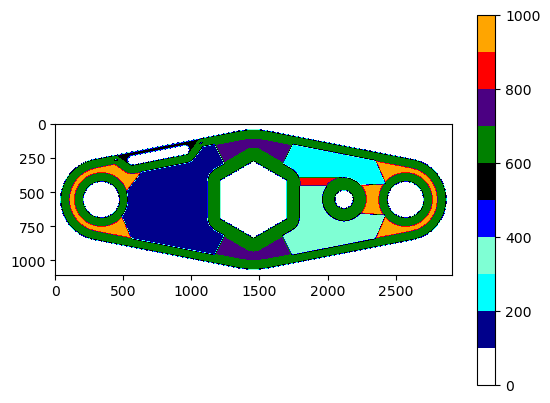

In [6]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

In [7]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


ROTAS

Rotas de Offset

In [8]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.3246588706970215
Total de [Making offset routes] : 21.70212435722351


Rotas de pontes

In [9]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)

Making bridges routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.46062397956848145
Total de [Making bridges routes] : 73.46130847930908


Rotas de Ziguezague

In [10]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)

Making zigzag routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.19779682159423828
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.2537343502044678
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.18860721588134766
salvando grafos
Total de [salvando grafos] : 0.12075352668762207
Total de [Making zigzag routes] : 86.69355034828186


Weaving

In [11]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[internal_weaving] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(internal_weaving, folders)
        # c.internal_weaving(internal_weaving, folders)

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 40.79628562927246
salvando rotas
Total de [salvando rotas] : 0.04528474807739258
Total de [Fase 5 b] : 40.84202527999878


Rotas de Thin Walls

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)

Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0722358226776123
Total de [Making thin walls routes] : 0.5900630950927734
Total de [Fase 5] : 0.5903902053833008


Unificando rotas EXTERNAS nas camadas

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external()
    plt.figure()
    plt.imshow(c.external_tree_route.get_img(c.base_frame))
    

Unificando rotas INTERNAS nas camadas

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal()
    plt.figure()
    plt.imshow(c.internal_tree_route.get_img(c.base_frame))

Unindo rotas de thin walls

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls()

Unindo todas as rotas e criando codigo G

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
from components import path

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 9"):
        c.close_final_path()
    print('\n \n \n')
path.layers_to_Gcode(camadas, folders)
# layers_to_Gcode(camadas, arquivos)